# London - Milestone Project
This project is based on a Kaggle dataset:
https://www.kaggle.com/edenau/london-bike-sharing-system-data

You actually have to retrieve to CSV files there **yourselves**!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [3]:
# This won't work for you - at least not directly!
df_stations = pd.read_csv("Data/bike_sharing/stations.csv", index_col="Station ID")
df_journeys = pd.read_csv("Data/bike_sharing/journeys.csv")

In [4]:
df_stations.head()

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,
1,19,51.529163,-0.109970,"River Street , Clerkenwell"
2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


#### London Coordinates
51.5074° N, 0.1278° W

Make sure to correctly convert **N** and **W** when using with a map.

### 1a) Plot Journey Durations
In your journey data, you have the journey duration for all trips. Play around with the plotting tools we talked about - do **journey durations depend on the time of day?**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_journeys.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


In [7]:
df_journeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542844 entries, 0 to 1542843
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Journey Duration  1542844 non-null  float64
 1   Journey ID        1542844 non-null  int64  
 2   End Date          1542844 non-null  int64  
 3   End Month         1542844 non-null  int64  
 4   End Year          1542844 non-null  int64  
 5   End Hour          1542844 non-null  int64  
 6   End Minute        1542844 non-null  int64  
 7   End Station ID    1542844 non-null  int64  
 8   Start Date        1542844 non-null  int64  
 9   Start Month       1542844 non-null  int64  
 10  Start Year        1542844 non-null  int64  
 11  Start Hour        1542844 non-null  int64  
 12  Start Minute      1542844 non-null  int64  
 13  Start Station ID  1542844 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 164.8 MB


In [8]:
df_journeys.describe()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
count,1.542844e+06,1.542844e+06,1.542844e+06,1.542844e+06,1542844.0,1.542844e+06,1.542844e+06,1.542844e+06,1.542844e+06,1.542844e+06,1542844.0,1.542844e+06,1.542844e+06,1.542844e+06
mean,1.328576e+03,7.956525e+03,1.380986e+01,8.363004e+00,17.0,1.399076e+01,2.982176e+01,3.646432e+02,1.380797e+01,8.362890e+00,17.0,1.375762e+01,2.948512e+01,3.670164e+02
std,6.718370e+03,4.485032e+03,8.444292e+00,4.808660e-01,0.0,4.969507e+00,1.742580e+01,2.377401e+02,8.445232e+00,4.808335e-01,0.0,4.901994e+00,1.724928e+01,2.375359e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,17.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,17.0,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.100000e+02,4.104000e+03,7.000000e+00,8.000000e+00,17.0,1.000000e+01,1.500000e+01,1.620000e+02,7.000000e+00,8.000000e+00,17.0,9.000000e+00,1.400000e+01,1.640000e+02
50%,8.470000e+02,8.028000e+03,1.300000e+01,8.000000e+00,17.0,1.500000e+01,3.000000e+01,3.260000e+02,1.300000e+01,8.000000e+00,17.0,1.400000e+01,3.000000e+01,3.310000e+02
75%,1.346000e+03,1.206300e+04,1.900000e+01,9.000000e+00,17.0,1.800000e+01,4.500000e+01,5.680000e+02,1.900000e+01,9.000000e+00,17.0,1.800000e+01,4.400000e+01,5.690000e+02
max,1.984700e+06,1.511100e+04,3.100000e+01,9.000000e+00,17.0,2.300000e+01,5.900000e+01,8.260000e+02,3.100000e+01,9.000000e+00,17.0,2.300000e+01,5.900000e+01,8.260000e+02


In [80]:
#Filter out some noise by just looking at Journeys > 1 min and < 2 h

#df_journeys[df_journeys["Journey Duration"]<60].count()
#df_journeys[df_journeys["Journey Duration"]<3600].count()


dff_journeys = df_journeys[(df_journeys["Journey Duration"]>60)&(df_journeys["Journey Duration"]<3600)].reset_index()
dff_journeys.drop(["index", "Journey ID"], axis=1, inplace=True, errors='ignore')
dff_journeys

,Journey Duration,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,13,9,17,19,33,605,13,9,17,19,13,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467985,270.0,8,8,17,0,2,32,7,8,17,23,58,42
1467986,911.0,8,8,17,0,13,625,7,8,17,23,58,222
1467987,447.0,8,8,17,0,7,453,7,8,17,23,59,130
1467988,424.0,8,8,17,0,6,405,7,8,17,23,59,755


[]

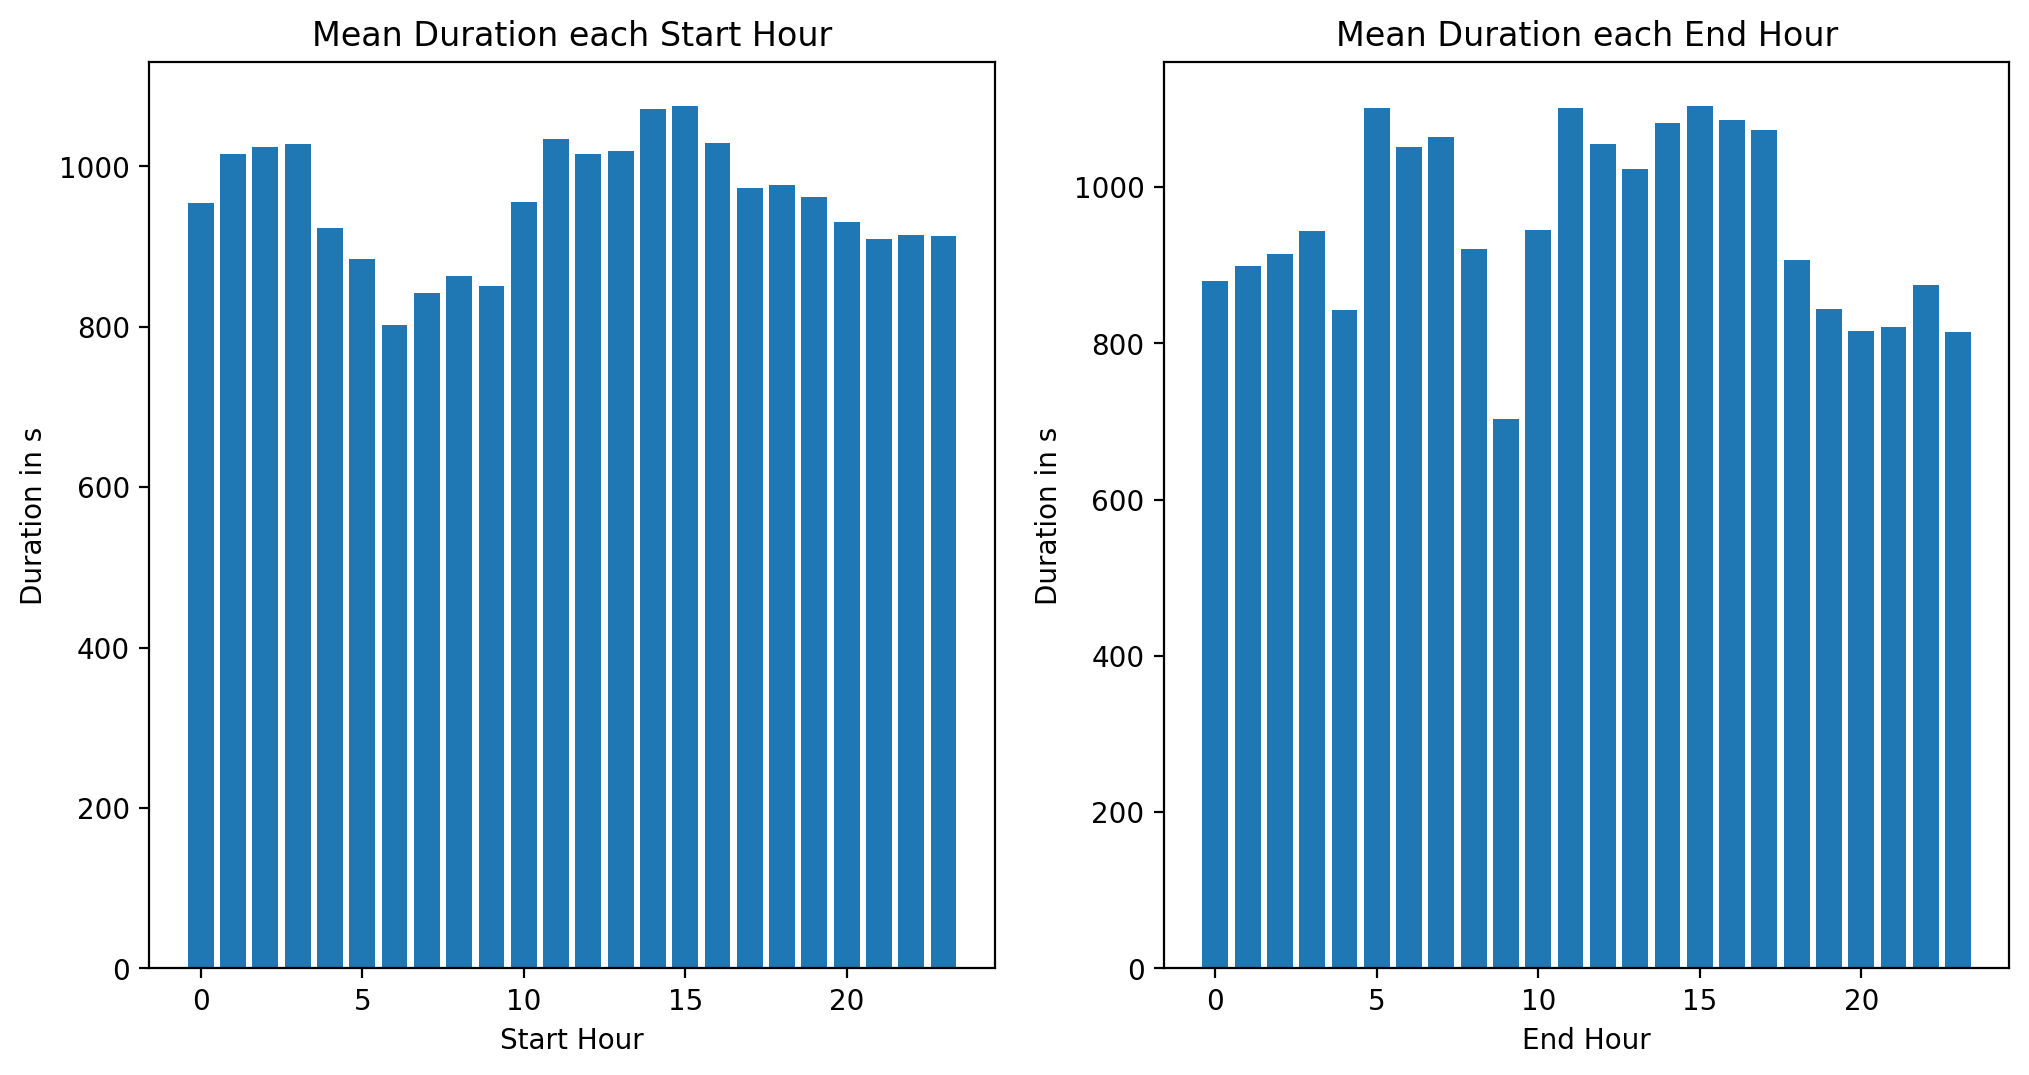

In [10]:
#Calculations
sr_mean_duration_per_hour_start=(dff_journeys.groupby("Start Hour").sum()["Journey Duration"] /
    dff_journeys.groupby("Start Hour").count()["Journey Duration"])
sr_mean_duration_per_hour_end=(dff_journeys.groupby("Start Hour").sum()["Journey Duration"] /
    dff_journeys.groupby("End Hour").count()["Journey Duration"])


#Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=200)

ax[0].bar(x=sr_mean_duration_per_hour_start.index, height=sr_mean_duration_per_hour_start.values)
ax[0].set_xlabel("Start Hour")
ax[0].set_ylabel("Duration in s")
ax[0].set_title("Mean Duration each Start Hour")


ax[1].bar(x=sr_mean_duration_per_hour_end.index, height=sr_mean_duration_per_hour_end.values)
ax[1].set_xlabel("End Hour")
ax[1].set_ylabel("Duration in s")
ax[1].set_title("Mean Duration each End Hour")



plt.plot()

In [11]:
dff_journeys.drop(["End Year", "Start Year"], axis=1).corr()

,Journey Duration,End Date,End Month,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Hour,Start Minute,Start Station ID
Journey Duration,1.000000,0.023427,-0.040627,0.066573,-0.000593,0.038312,0.023287,-0.040698,0.043314,-0.007661,0.037596
End Date,0.023427,1.000000,-0.344916,0.013811,-0.000795,0.007338,0.999483,-0.344685,0.013452,-0.000827,0.006573
End Month,-0.040627,-0.344916,1.000000,-0.026306,-0.001182,-0.007714,-0.344500,0.999831,-0.025770,0.001024,-0.007296
End Hour,0.066573,0.013811,-0.026306,1.000000,-0.052356,0.079198,0.014028,-0.025852,0.962204,-0.013926,-0.030666
End Minute,-0.000593,-0.000795,-0.001182,-0.052356,1.000000,-0.002418,-0.000722,-0.001000,-0.011200,0.019829,0.002136
End Station ID,0.038312,0.007338,-0.007714,0.079198,-0.002418,1.000000,0.007298,-0.007738,0.081861,-0.002005,0.239344
Start Date,0.023287,0.999483,-0.344500,0.014028,-0.000722,0.007298,1.000000,-0.344847,0.013305,-0.000871,0.006530
Start Month,-0.040698,-0.344685,0.999831,-0.025852,-0.001000,-0.007738,-0.344847,1.000000,-0.026077,0.000831,-0.007283
Start Hour,0.043314,0.013452,-0.025770,0.962204,-0.011200,0.081861,0.013305,-0.026077,1.000000,-0.055066,-0.031187
Start Minute,-0.007661,-0.000827,0.001024,-0.013926,0.019829,-0.002005,-0.000871,0.000831,-0.055066,1.000000,-0.002689


#### Result

<li>Low Correlation between <i>Start Hour</i> and <i>Journey Duration</i> ( <b>~0.0433</b>)</li>
<li>Low Correlation between <i>End Hour</i> and <i>Journey Duration</i> ( <b>~0.0666</b>)</li>

### 1b) Predict Journey Durations
You have lot's of information for the trip. Use just the data that is known at the beginning of the trip (i.e., start time and start station) to predict the journy duration. Use any regression model your a comfortable with.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
data = dff_journeys[["Start Date", "Start Month", "Start Year", 
                     "Start Hour", "Start Minute", "Start Station ID", 
                     "Journey Duration"]]

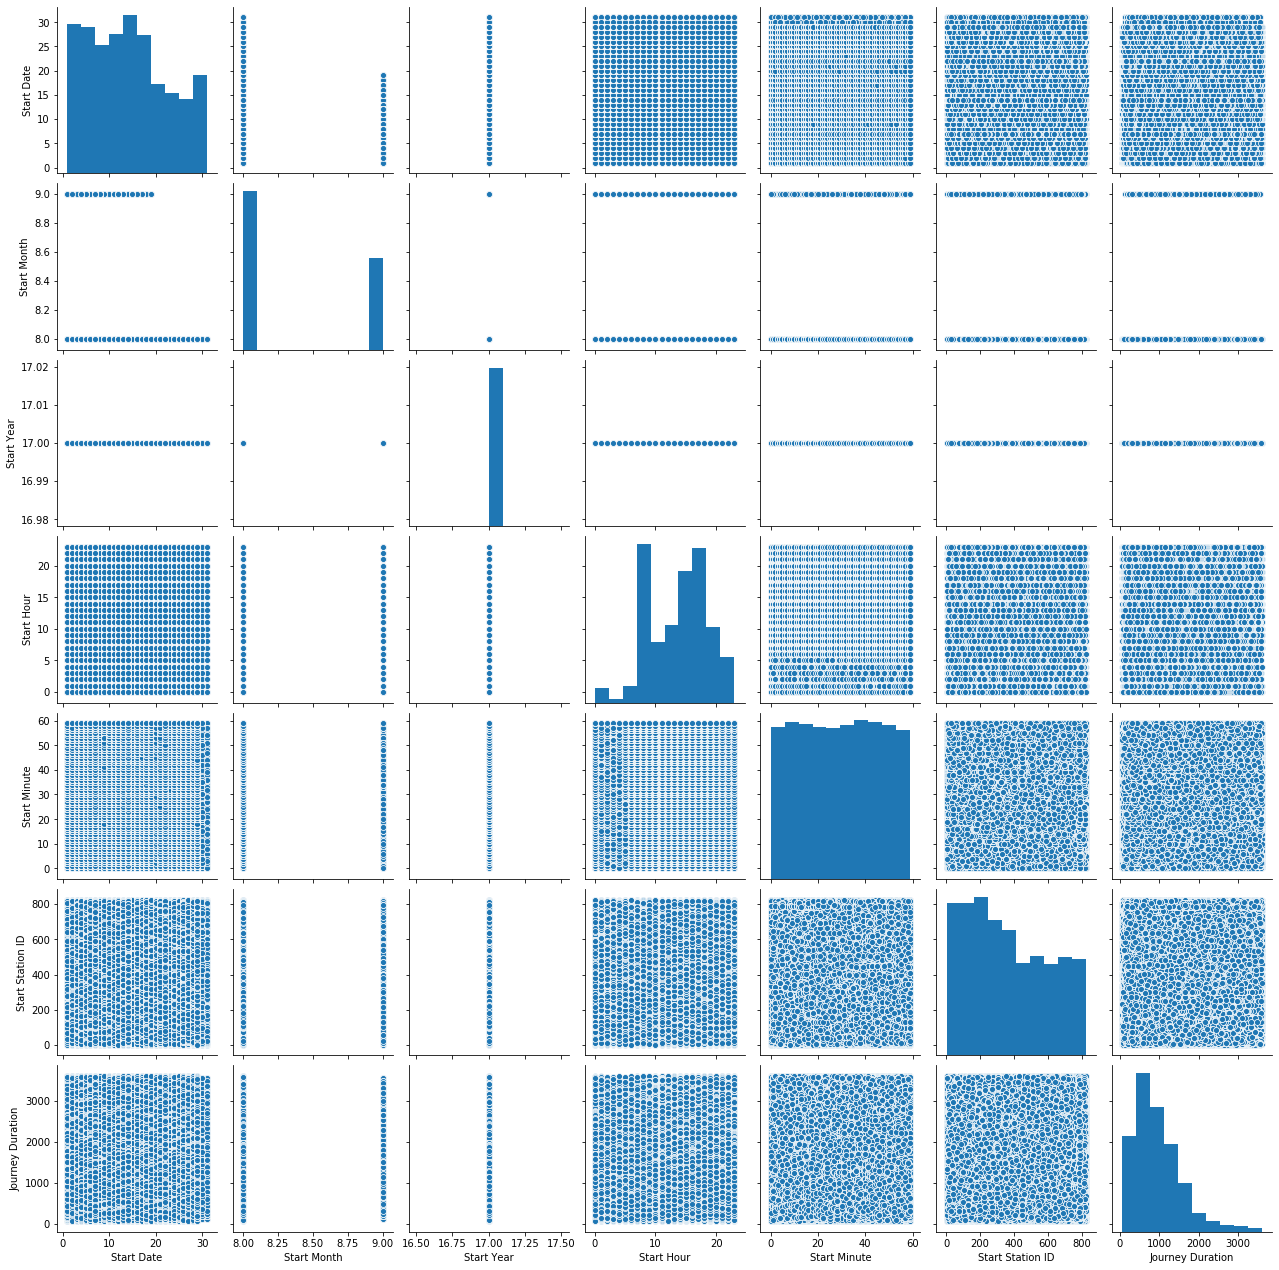

In [65]:
sns.pairplot(data)

In [14]:
X = data.drop("Journey Duration", axis=1)
y = data[["Journey Duration"]]

In [15]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Split Data in training and test for X and y

st_scaler = StandardScaler() #initialize Scaler
st_scaler.fit(X_train) #fit Scaler to train set
X_train_scaled = st_scaler.transform(X_train) #Scale train set

lin = LinearRegression() #initialize Linear Regression
lin.fit(X_train_scaled, y_train) #train model

X_test_scaled = st_scaler.transform(X_test) #Scale test set
y_pred = lin.predict(X_test_scaled) #predict y for test set

metrics.r2_score(y_test, y_pred) #measure performance

0.005279173841461704

[]

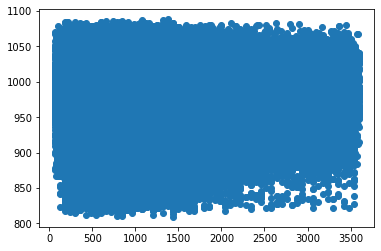

In [16]:
plt.scatter(y_test, y_pred)
plt.plot()

In [17]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

RMSE:  617.9718432833961
MAE:  472.1749528948012


### 2a) Stations
In the "Folium" Notebook, I showed you how to create a colored map with some data. Try to create a similar map using the number of stations in the different boroughs of London (provided as GeoJson in this folder)

<b>Helper Methods</b>

In [48]:
#Create df with just stations id and count
df_stations_count = pd.DataFrame(data=(dff_journeys.groupby("Start Station ID")
                                       .count()["Journey Duration"])
                                ).rename({"Journey Duration": "Count"}, axis=1)

#Merge stations and count
df_joined_stations_count = df_stations.merge(df_stations_count, how="left", left_on=df_stations.index, right_on="Start Station ID")

#look for NaN
df_joined_stations_count[df_joined_stations_count["Count"].isna()]


,Start Station ID,Capacity,Latitude,Longitude,Station Name,Count
718,775,33,51.496664,-0.223868,"Little Brook Green, Brook Green",NaN
762,799,24,51.497698,-0.137598,"Kings Gate House, Westminster",NaN


In [49]:
#Drop NaN
df_joined_stations_count.dropna(inplace=True)
df_joined_stations_count.reset_index(inplace=True)
df_joined_stations_count.drop("index", axis=1, inplace=True, errors='ignore')

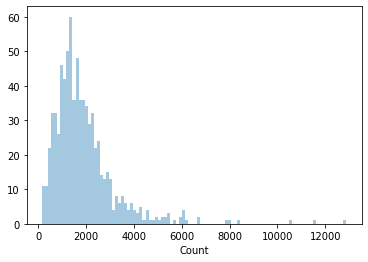

In [50]:
#Look for Usefull Categories
sns.distplot(df_joined_stations_count["Count"], bins=100, kde=False)
plt.show()

In [51]:
#Method that creates Labels for different booking counts
#COULD ALSO BE DONE BEFORE AND FED TO THE DATAFRAME!!!
def get_Rad_Color(id):
    tmp = int(df_joined_stations_count[df_joined_stations_count["Start Station ID"]==id]["Count"])
    _start_value = 1000
    _add_value = 1000
    
    if(tmp<_start_value):
        return [5, "green"]
    elif(tmp<(_start_value+_add_value)):
        return [7, "orange"]
    else:
        return [9, "red"]

In [53]:
#51.5074° N, 0.1278° W

tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr="Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."

#Create MAP
m = folium.Map(location=[51.506949, -0.122876], zoom_start=12, tiles=tiles, attr=attr)

#Create Boroughs
folium.Choropleth(
    geo_data = f"Data/boroughs.geojson",
    #data = df_joined_stations_count,
    #columns=["", ""],
    #key_on="properties.name",
    fill_color="PuBuGn",
    #fill_opacity=0.5,
    line_opacity=0.7,
    legend_name="Rides Percentage").add_to(m)

#Plot Markers
for i in range(df_joined_stations_count["Start Station ID"].count()):
    #receive categories from method above
    rad_col = get_Rad_Color(df_joined_stations_count.loc[i]["Start Station ID"])
    
    folium.CircleMarker(
        location=[df_joined_stations_count["Latitude"][i], df_joined_stations_count["Longitude"][i]],
        radius = rad_col[0],
        popup = df_joined_stations_count["Station Name"][i],
        fill_color = rad_col[1],
        color = rad_col[1]
    ).add_to(m)
    
m

# 2b) Coordinates
You know the stations' coordinates. Try to add two new columns to the journey DataFrame - Start Coordinate and End Coordinate

In [83]:
#Saving of Long and Lat in one Value creates contradiction to sigularity

#Getting Long & Lat for start
df_all_halfdata = dff_journeys.merge(df_stations, how="inner", 
                                 left_on=dff_journeys["Start Station ID"], 
                                 right_on=df_stations.index
                                ).drop(["key_0", "Capacity", "Station Name"], axis=1)
df_all_halfdata.rename(columns={"Latitude": "Start Latitude", "Longitude": "Start Longitude"})

#Getting Long & Lat for end
df_all_data = df_all_halfdata.merge(df_stations, how="inner", 
                                 left_on=df_all_halfdata["End Station ID"], 
                                 right_on=df_stations.index
                                ).drop(["key_0", "Capacity", "Station Name"], axis=1)
df_all_data.rename(columns={"Latitude_x": "Start Latitude", "Longitude_x": "Start Longitude", "Latitude_y": "End Latitude", "Longitude_y": "End Longitude"})


,Journey Duration,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Start Latitude,Start Longitude,End Latitude,End Longitude
0,2040.0,19,9,17,18,0,478,19,9,17,17,26,251,51.518908,-0.079249,51.521889,-0.046670
1,840.0,17,9,17,10,52,478,17,9,17,10,38,251,51.518908,-0.079249,51.521889,-0.046670
2,900.0,18,9,17,7,14,478,18,9,17,6,59,251,51.518908,-0.079249,51.521889,-0.046670
3,600.0,15,9,17,18,38,478,15,9,17,18,28,251,51.518908,-0.079249,51.521889,-0.046670
4,840.0,17,9,17,10,52,478,17,9,17,10,38,251,51.518908,-0.079249,51.521889,-0.046670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445558,600.0,31,8,17,9,20,688,31,8,17,9,10,659,51.464370,-0.174619,51.460951,-0.200667
1445559,627.0,15,8,17,9,24,688,15,8,17,9,14,659,51.464370,-0.174619,51.460951,-0.200667
1445560,579.0,15,8,17,10,34,688,15,8,17,10,24,659,51.464370,-0.174619,51.460951,-0.200667
1445561,486.0,21,8,17,10,26,688,21,8,17,10,18,659,51.464370,-0.174619,51.460951,-0.200667


### 2c) Predict direction
Knowing the coordinate you can calculate it's distance to the city center. Create two more columns in your journey DataFrame, Start Distance and End Distance. Based on these, create another column - direction - that indicates whether the journey is inbound (i.e., towards the city center), or outbound.
Use this column as target for a binary classification. As features, use only start time and start distance!

### Extra - Revisit 1b)
Using not only the start time (and Station ID), but also the start distance, does your regression for journey durations improve?

### Extra - Plotting
We have been talking quite a bit about beatiful visualizations. Try to be creative and create some! 